In [1]:
import geopandas as gpd
import pandas as pd

Read in Census shapefile

In [2]:
county_file = gpd.read_file("../data/county/")
# make sure the crs is set
county_file.crs = {"init": "epsg:4326" }

Preview geometries

In [3]:
county_file.plot(
    figsize = (16,9)
);

Remove Alaska, Hawaii and various territories

In [4]:
counties = county_file[ 
    ~county_file["STATEFP"].str.contains(
        "72|66|60|02|78|15|69"
    )
]

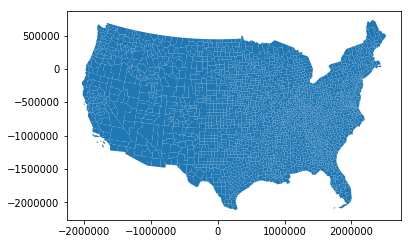

In [5]:
counties = county_file[ 
    ~county_file["STATEFP"].str.contains(
        "72|66|60|02|78|15|69"
    )
].to_crs(
    # http://spatialreference.org/ref/epsg/2163/
    {'init':'epsg:2163'}
)

counties.plot()

Subset columns

In [6]:
counties[
    ['STATEFP',
     'COUNTYFP', 
     'COUNTYNS', 
     'GEOID', 
     'NAME', 
     'NAMELSAD', 
     'ALAND',
     'AWATER',
     'INTPTLAT',
     'INTPTLON',
     'geometry']
].to_file("../output/counties_simple/counties_simple.shp")
# Note that the deprecation warning will go away with next geopandas release: https://github.com/geopandas/geopandas/issues/882

/Users/scottpham/.local/share/virtualenvs/geopandas-sVWd-EJh/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


View geometries

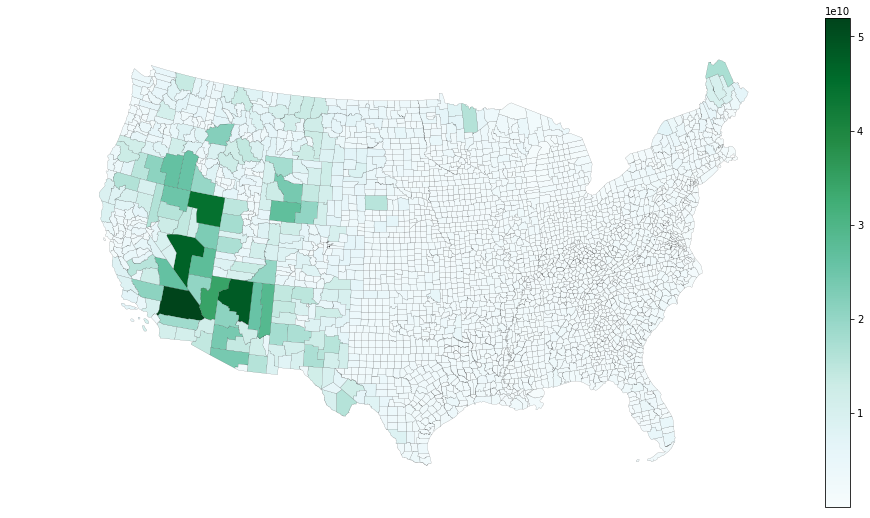

In [7]:
gpd.read_file("../output/counties_simple/").plot(
    column = 'ALAND',
    figsize = (16, 9),
    cmap = "BuGn",
    legend = True,
    edgecolor = "black",
    linewidth = 0.1
).axis('off');